# Simple Linear Regression

# Assignment-4, (1.) Delivery dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter("ignore")

In [2]:
#Import Dataset
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

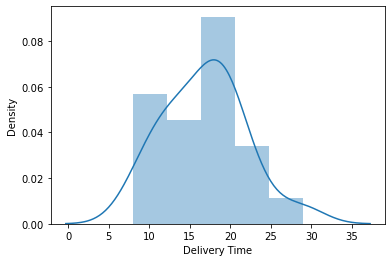

In [5]:
sns.distplot(df["Delivery Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

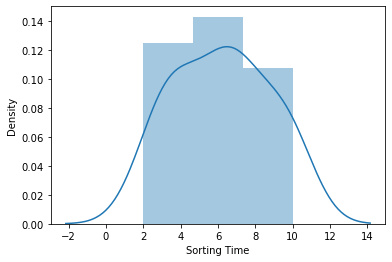

In [6]:
sns.distplot(df["Sorting Time"])

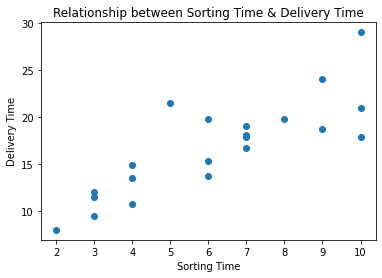

In [7]:
plt.scatter(df["Sorting Time"],df["Delivery Time"])
plt.title("Relationship between Sorting Time & Delivery Time")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

# Feature Engineering

In [8]:
#Renaming Columns
df = df.rename({"Delivery Time":"DT", "Sorting Time":"ST"}, axis=1)
df.head(5)

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Data Transformation

1. Log Transformation: Transform the response variable from y to log(y).

In [9]:
#create log-transformed data
df_log = np.log(df)

Text(0.5, 1.0, 'Log transformed data')

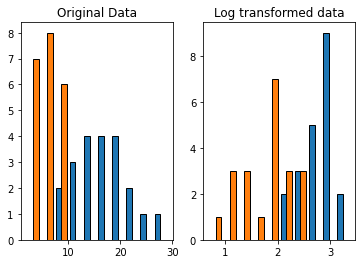

In [10]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log transformed data')

2. Square Root Transformation: Transform the response variable from y to √y.

In [11]:
#create log-transformed data
df_log = np.sqrt(df)

Text(0.5, 1.0, 'Square Root Transformed Data')

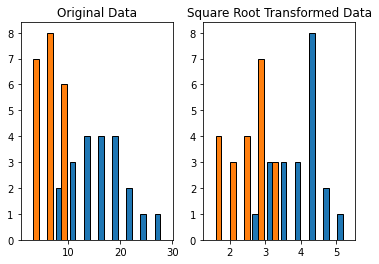

In [12]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

3. Cube Root Transformation: Transform the response variable from y to y1/3.

In [13]:
#create log-transformed data
df_log = np.cbrt(df)

Text(0.5, 1.0, 'Cube Root Transformed Data')

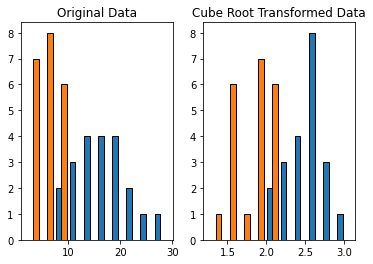

In [14]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')


4. Box Cox transformation in Python

In [15]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df.insert(len(df.columns), 'B_Boxcox', 
              boxcox(df.iloc[:, 0])[0])


Text(0.5, 1.0, 'Boxcox data')

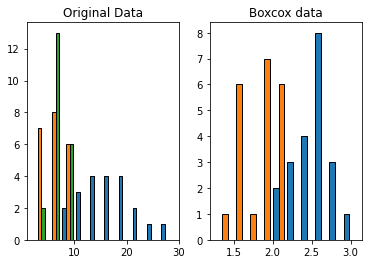

In [16]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(df_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Boxcox data')

# Correlation Analysis

In [17]:
df.corr()

,DT,ST,B_Boxcox
DT,1.000000,0.825997,0.996117
ST,0.825997,1.000000,0.838251
B_Boxcox,0.996117,0.838251,1.000000


<AxesSubplot:xlabel='ST', ylabel='DT'>

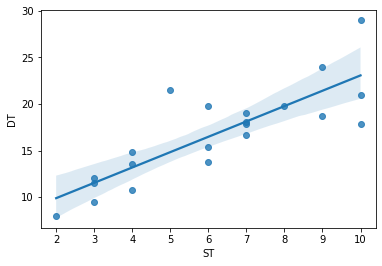

In [18]:
sns.regplot(x=df["ST"], y=df["DT"])

In [19]:
x = df["DT"]
y = df["ST"]

In [20]:
n = len("DT")

b1 = (n*sum(x*y) - sum(x)*sum(y))/(n*sum(x**2)-(sum(x))**2)
b0 = (sum(y) - b1*sum(x))/n

In [21]:
y_hat = b0+b1*x

In [22]:
y_hat

0      7.806950
1      5.044979
2      7.346622
3      8.911738
4     10.753052
5      5.726265
6      7.070425
7      3.571928
8      6.665336
9      6.978359
10     7.376083
11     4.032257
12     6.216055
13     4.308454
14     4.503633
15     5.553182
16     5.137045
17     6.742671
18     3.019534
19     6.639557
20     7.991082
Name: DT, dtype: float64

In [23]:
pd.DataFrame({"Actual":y,"Predicted":y_hat,"Residual":y-y_hat})

,Actual,Predicted,Residual
0,10,7.806950,2.193050
1,4,5.044979,-1.044979
2,6,7.346622,-1.346622
3,9,8.911738,0.088262
4,10,10.753052,-0.753052
5,6,5.726265,0.273735
6,7,7.070425,-0.070425
7,3,3.571928,-0.571928
8,10,6.665336,3.334664
9,9,6.978359,2.021641


In [24]:
#Mean Square Error ()
mse = (sum((y-y_hat)**2))/n
mse

21.11039874407602

In [25]:
rmse = np.sqrt(mse)
rmse

4.5946053959046385

In [26]:
#R-Square

ss_res = sum((y-y_hat)**2)
ss_tot = sum((y-y.mean())**2)

In [27]:
r2 = 1-ss_res/ss_tot

In [28]:
r2

0.6733099678514396

# Model Building

In [29]:
model = smf.ols("DT~ST",data=df).fit()

# Model Testing

In [30]:
# Finding Coefficient parameters
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [31]:
# Finding t_values and p_values
model.tvalues , model.pvalues

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [32]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [33]:
# Manual prediction for say sorting time 5
DT = (6.582734) + (1.649020)*(5)
DT

14.827834

In [34]:
# Automatic Prediction for say sorting time 5, 8
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [35]:
data_pred=pd.DataFrame(new_data,columns=['ST'])
data_pred

,ST
0,5
1,8


In [36]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Linear Regression with Sciket_learn libraries

In [37]:
df

,DT,ST,B_Boxcox
0,21.00,10,7.818086
1,13.50,4,5.750615
2,19.75,6,7.500267
3,24.00,9,8.547516
4,29.00,10,9.676687
5,15.35,6,6.301088
6,19.00,7,7.305177
7,9.50,3,4.427476
8,17.90,10,7.012599
9,18.75,9,7.239373


In [38]:
X = df[["DT"]]
Y = df["ST"]

In [39]:
X

,DT
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [40]:
X.head(5)

,DT
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00


In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [42]:
model.intercept_

-0.7566733660351268

In [43]:
model.coef_

array([0.41374363])

In [44]:
y_pred = model.predict(X)

In [45]:
pd.DataFrame({"Actual":Y,"Predicted":y_pred,"Residual":Y-y_pred})

,Actual,Predicted,Residual
0,10,7.931943,2.068057
1,4,4.828866,-0.828866
2,6,7.414763,-1.414763
3,9,9.173174,-0.173174
4,10,11.241892,-1.241892
5,6,5.594291,0.405709
6,7,7.104456,-0.104456
7,3,3.173891,-0.173891
8,10,6.649338,3.350662
9,9,7.001020,1.998980


# Metrics

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y,y_pred)

1.9553633044888064

In [47]:
from sklearn.metrics import r2_score
r2_score(Y,y_pred)

0.682271474841723

In [48]:
df.head(5)

,DT,ST,B_Boxcox
0,21.00,10,7.818086
1,13.50,4,5.750615
2,19.75,6,7.500267
3,24.00,9,8.547516
4,29.00,10,9.676687


In [49]:
model.predict([[19]])

array([7.10445557])

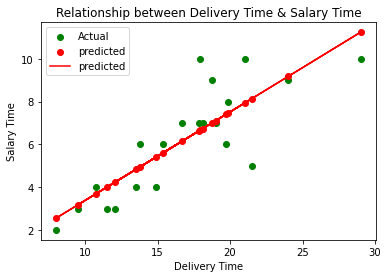

In [50]:
plt.scatter(df["DT"],df["ST"],color='green',label="Actual")
plt.scatter(df["DT"],y_pred,color='red',label="predicted")
plt.plot(df["DT"],y_pred,color='red',label="predicted")

plt.title("Relationship between Delivery Time & Salary Time")
plt.xlabel("Delivery Time")
plt.legend()
plt.ylabel("Salary Time")
plt.show()